# This script will read in lat/lon locations for all the the individual GHD datasets and then plot them on a map. 

In [12]:
reset -f

In [16]:
# Setup the Analysis
import calendar
import numpy as np
import netCDF4
import matplotlib
import copy
from matplotlib import pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from mpl_toolkits.basemap import Basemap, cm
#sns.set(palette="Set5")

# Embeds plots inside the notebook (use in iPython Notebook)
%matplotlib inline

# For plotting a rectangle on the maps
def plot_rectangle(bmap, lonmin,lonmax,latmin,latmax):
    xs = [lonmin,lonmax,lonmax,lonmin,lonmin]
    ys = [latmin,latmin,latmax,latmax,latmin]
    bmap.plot(xs, ys,latlon = True, color='k', linestyle='--', linewidth=3)

# Rectangle Boundaries
lonmin=-2; lonmax=8; latmin=43; latmax=51

lonmin=4; lonmax=6; latmin=44; latmax=46
lonmin=5; lonmax=6; latmin=45; latmax=46



In [17]:
# Load lat/lon data

# ALL DAUX SITES: Pull out latitude and longitude
infile = '../data/site_locs.csv'   # Name of the data file
df=pd.read_csv(infile)
lat_all=np.float64(df['Latitude'])
lon_all=np.float64(df['Longitude'])

# CORE DAUX SITES: Pull out latitude and longitude
infile = '../data/site_locs_core_v02.csv'   # Name of the data file
df=pd.read_csv(infile)
lat_core=np.float64(df['Latitude'])
lon_core=np.float64(df['Longitude'])


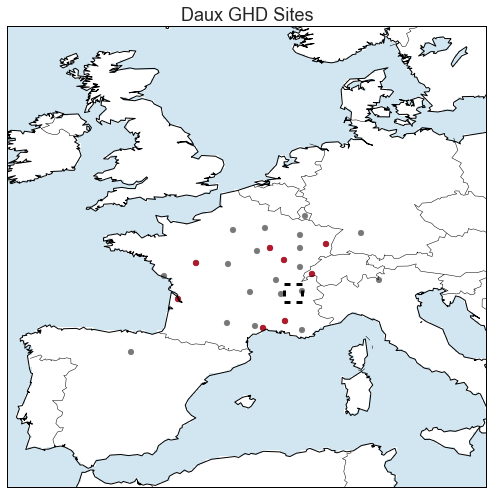

In [18]:
# Create the Map
# Now, map up these lat lon locations
# Regional Projections
proj_txt='cyl'      # Equidistant cyclindrical

# Title
title_txt = 'Daux GHD Sites'
fontdict = {'fontsize': 18}

# Map up correlation
# Equidistant Cylindrical
fig = plt.figure(figsize=(16,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# equidistant cylindrical
m = Basemap(projection=proj_txt,resolution='l',\
            llcrnrlon=-10.,llcrnrlat=35.,\
            urcrnrlon=16,urcrnrlat=60)
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawlsmask(land_color='w', ocean_color=np.float64([209,230,241])/255)
x, y = m(lon_all,lat_all);   m.scatter(x,y,35,marker='o',color=np.float64([120,120,120])/255)
x, y = m(lon_core,lat_core); m.scatter(x,y,35,marker='o',color=np.float64([179,24,43])/255)
#m.scatter(x,y,45,marker='o',color=np.float64([103,0,31])/255)
# Plot rectangle over region
plot_rectangle(m, lonmin, lonmax, latmin, latmax) 
plt.title(title_txt,fontdict)
plt.show()
#out_txt = './figures/step02/ghd_site_locs_ALL.svg';
#fig.savefig(out_txt, format='svg', dpi=1200) # vector graphics for adobe illustrator 
out_txt = '../figures/step02/ghd_site_locs_ALL.eps';
#fig.savefig(out_txt, format='eps', dpi=300) # vector graphics for adobe illustrator 
